<a href="https://colab.research.google.com/github/divyakanojia/machinelearning/blob/main/Copy_of_Project_3rd_Dataset(Diabities).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
df3=pd.read_csv('/content/diabetes (1).csv')

In [ ]:
df3.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df3.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df3.shape

(768, 9)

In [ ]:
df3.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


<Axes: >

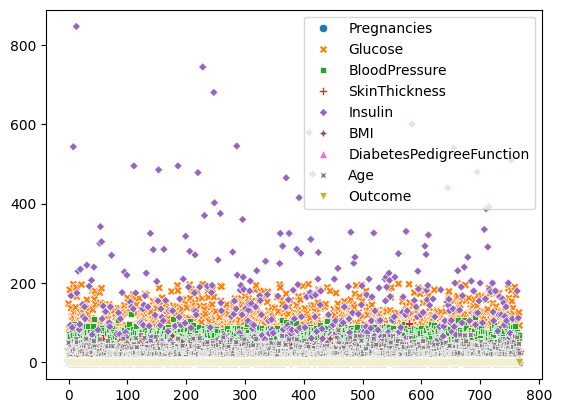

In [ ]:
sns.scatterplot(df3)

In [ ]:
for feature in df3:
  Q1=df3[feature].quantile(0.25)
  Q3=df3[feature].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  if df3[(df3[feature]>upper_bound) | (df3[feature]<lower_bound)].any(axis=None):
    df3[feature]=df3[feature].clip(lower_bound,upper_bound)
  print(df3)




     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0      148             72             35        0  33.6   
1            1.0       85             66             29        0  26.6   
2            8.0      183             64              0        0  23.3   
3            1.0       89             66             23       94  28.1   
4            0.0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0      101             76             48      180  32.9   
764          2.0      122             70             27        0  36.8   
765          5.0      121             72             23      112  26.2   
766          1.0      126             60              0        0  30.1   
767          1.0       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [ ]:
df3.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72,35,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66,29,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64,0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66,23,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40,35,168.0,43.1,1.200,33.0,1


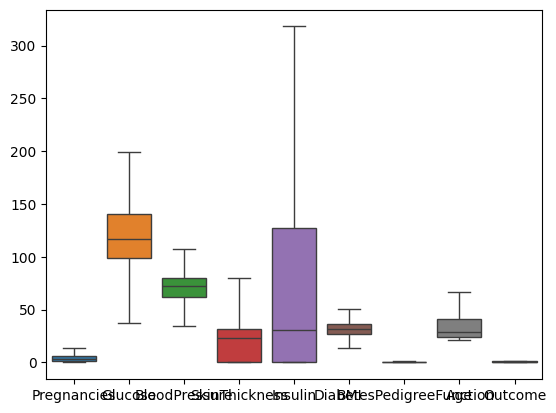

In [ ]:
sns.boxplot(df3)
plt.show()

<Axes: ylabel='Insulin'>

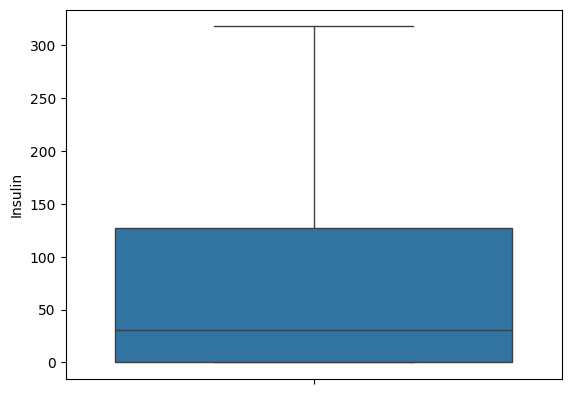

In [ ]:
sns.boxplot(df3['Insulin'])

In [ ]:
X=df3.drop(['Outcome','Insulin'],axis=1)
y=df3['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness   BMI  \
0            6.0    148.0             72             35  33.6   
1            1.0     85.0             66             29  26.6   
2            8.0    183.0             64              0  23.3   
3            1.0     89.0             66             23  28.1   
4            0.0    137.0             40             35  43.1   
..           ...      ...            ...            ...   ...   
763         10.0    101.0             76             48  32.9   
764          2.0    122.0             70             27  36.8   
765          5.0    121.0             72             23  26.2   
766          1.0    126.0             60              0  30.1   
767          1.0     93.0             70             31  30.4   

     DiabetesPedigreeFunction   Age  
0                       0.627  50.0  
1                       0.351  31.0  
2                       0.672  32.0  
3                       0.167  21.0  
4                       1.200

In [ ]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(X)



array([[ 0.64714967,  0.86192556,  0.09269135, ...,  0.20935933,
         0.58892732,  1.44569096],
       [-0.84896998, -1.15943299, -0.33020145, ..., -0.78425421,
        -0.37810147, -0.189304  ],
       [ 1.24559754,  1.98490253, -0.47116571, ..., -1.25267202,
         0.74659506, -0.10325164],
       ...,
       [ 0.34792574, -0.00437096,  0.09269135, ..., -0.84103213,
        -0.74949659, -0.27535637],
       [-0.84896998,  0.15605432, -0.75309424, ..., -0.28744744,
        -0.38510892,  1.18753386],
       [-0.84896998, -0.90275254, -0.04827292, ..., -0.24486401,
        -0.50423566, -0.87772293]])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=25)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rmc=RandomForestClassifier()
rmc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
original_feature_names = rmc.feature_names_in_
features2 = pd.Series(rmc.feature_importances_, index=original_feature_names).sort_values(ascending=False)

features2 = features2[features2.index.isin(X.columns)]



Text(0.5, 1.0, 'Visualizing Important Features')

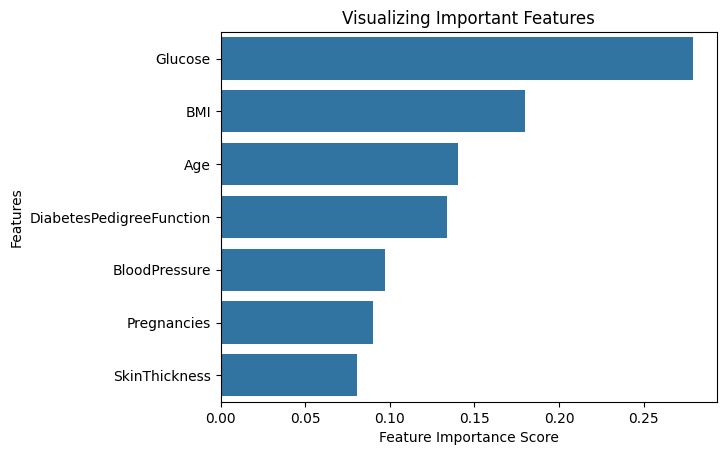

In [ ]:

sns.barplot(x=features2,y=features2.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')

# Logistic regression

In [ ]:
X = df3.drop(['Outcome'], axis=1)
y = df3['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
lr1 = LogisticRegression()
lr1.fit(X_train, y_train)

LogisticRegression()

In [ ]:
pred=lr1.predict(X_test)

In [ ]:
import pickle
with open('lr1.pkl','wb') as f:
  pickle.dump(lr1,f)

In [ ]:
with open('/content/lr1.pkl','rb') as f:
  model = pickle.load(f)
model.predict([[1 ,1 ,1 ,1 ,1 ,1, 1, 1]])

array([0])

In [ ]:
lr1.predict([[1 ,1 ,1 ,1 ,1 ,1, 1, 1]])

array([0])

In [ ]:
acc=accuracy_score(y_test,pred)
print('The Accuracy of the given model using Logistic Regression is about:',acc)

The Accuracy of the given model using Logistic Regression is about: 0.7519685039370079


In [ ]:

cm=confusion_matrix(y_test,pred)
cm

array([[139,  29],
       [ 34,  52]])

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       168
           1       0.64      0.60      0.62        86

    accuracy                           0.75       254
   macro avg       0.72      0.72      0.72       254
weighted avg       0.75      0.75      0.75       254



# Random forest classifier

In [ ]:
rmcc=RandomForestClassifier(n_estimators=100,random_state=42,class_weight='balanced')
rmcc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
pred2=rmcc.predict(X_test)

In [ ]:
acc=accuracy_score(y_test,pred2)
print('The Accuracy of the given model using Random Forest Classifier is about:',acc)

The Accuracy of the given model using Random Forest Classifier is about: 0.7598425196850394


In [ ]:
cm=confusion_matrix(y_test,pred2)
cm

array([[139,  29],
       [ 32,  54]])

In [ ]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       168
           1       0.65      0.63      0.64        86

    accuracy                           0.76       254
   macro avg       0.73      0.73      0.73       254
weighted avg       0.76      0.76      0.76       254



# Decision Tree

In [ ]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=8,random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [ ]:
dt.predict([[1 ,1 ,1 ,1 ,1 ,1 ,1 ,1]])

In [ ]:
pred3=dt.predict(X_test)

In [ ]:
acc=accuracy_score(y_test,pred3)
print('The Accuracy of the given model using DecisionTreeClassifier is about:',acc)

The Accuracy of the given model using DecisionTreeClassifier is about: 0.7244094488188977


In [ ]:

cm =confusion_matrix(y_test, pred3)
cm

array([[127,  41],
       [ 29,  57]])

In [ ]:

print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       168
           1       0.58      0.66      0.62        86

    accuracy                           0.72       254
   macro avg       0.70      0.71      0.70       254
weighted avg       0.74      0.72      0.73       254



# Using Grid Search

In [ ]:
param_grid = {'n_estimators': [550,600,700],'learning_rate': [0.04, 0.05, 0.9],'max_depth': [7,8,9]}

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid, cv=3, scoring='accuracy')


grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



# K Fold cross validation

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
import pandas as pd


X = df3.drop(['Outcome'], axis=1)
y = df3['Outcome']

k = 6

kf = KFold(n_splits=k)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = LogisticRegression()
    model.fit(X_train, y_train)

    pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test,pred))

# SVM

In [ ]:
svm=SVC(kernel='linear',C=100)
svm.fit(X_train,y_train)

In [ ]:
pred4=svm.predict(X_test)

In [ ]:
acc=accuracy_score(y_test,pred4)
print('The Accuracy of the given model using Support Vector Machine is about:',acc)

# Using poly kernel

In [ ]:
svm=SVC(kernel='poly',C=100)
svm.fit(X_train,y_train)

In [ ]:
pred5=svm.predict(X_test)

In [ ]:
acc=accuracy_score(y_test,pred5)
print('The Accuracy of the given model using Support Vector Machine is about:',acc)

In [ ]:
print(classification_report(y_test,pred5))

# Using KNN algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

In [ ]:
print(f'Model accuracy score with KNN : {accuracy_score(y_test,y_pred):0.4f}')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5, metric='euclidean',p=2)
classifier.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

 # Gradient Boosting Classifier is the best algorithm for this dataset because it gives good accuracy about with GridSearchCV :79%.

In [ ]:
!pip install streamlit

In [ ]:
import streamlit as st
import joblib
joblib.dump(grid_search,'diabetes.pkl')
joblib.load('diabetes.pkl')